<a href="https://colab.research.google.com/github/2003006/KNN--titanic-dataset/blob/main/KNN_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEFINING THE QUESTION

##a) ***Specifying the Data Analytic Question***

Building a K-nearest neighbor (kNN) model classifier and calculate the resulting metrics

##b) ***Defining the Metric for Success***

KNN Multinomial Model with accuracy score between 70-90%

##c) ***Understanding the contex***

Dataset used for this project include:
- train [https://archive.org/download/train5_202002/train%20%285%29.csv]
- test [https://archive.org/download/test1_202002/test%20%281%29.csv]

Both of the dataset had the following columns:
- survived, 
- pclass
- sex
- age
- sibsp
- parch
- fare
- cabin
- embarked


d) ***Recording the Experimental Design***


Steps to implement include ;

- Data Pre-processing 
- EDA
- Fitting the model(KNN) using different splits
- Predicting the test result
- Creating a confusion matrix and building the classification report
- Test accuracy of the result


##e) ***Data Relevance***


Provided data is relevant to the tasks to be performed

# IMPORT REQUIRED LIBRARIES

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.font_manager
%matplotlib inline
#import plotly.plotly  as py
import plotly.graph_objs as go
#plotly.tools.set_credentials_file(username='***', api_key='***')

# LOADING THE DATASETS

In [175]:
train=pd.read_csv("/content/train (5).csv")

In [176]:
test = pd.read_csv("/content/test (1).csv")

# PREVIEWING THE DATASET

## ***previewing the test dataset***

In [177]:
#previewing the head
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [178]:
#previewing the tail
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## ***previewing the train dataset***

In [179]:
#previewing the head
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
#previewing the tail.
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# GETTING THE DATASET INFO

## *** for train***

In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## ***for test***

In [182]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# MERGING THE TRAIN AND TEST DATASET

In [183]:
#concating the dataset
df = pd.concat([train,test])

In [184]:
#previewing the concated dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
#previewing the tail
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [186]:
df.set_index('PassengerId',inplace=True)

In [187]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [189]:
# A nice data dictionary will help us better understand the data

data ={
'Variable' : ['survival', 'pclass','sex','Age','sibsp','parch','ticket','fare','cabin','embarked'],
    'Definition' : ['Survival','Ticket class','Sex','Age in years','# of siblings / spouses aboard the Titanic',
                    '# of parents / children aboard the Titanic','Ticket number','Passenger fare','Cabin number',
                   'Port of Embarkation']}

Data_Dictionary = pd.DataFrame(data = data,columns=['Variable','Definition','Key'])
Data_Dictionary.fillna(' ', inplace=True)

Data_Dictionary.Key[0] = 'No -> 0, Yes -> 1'
Data_Dictionary.Key[1] = '1 = 1st, 2 = 2nd, 3 = 3rd'
Data_Dictionary.Key[9] = 'C = Cherbourg, Q = Queenstown, S = Southampton'

In [190]:
Data_Dictionary

,Variable,Definition,Key
0,survival,Survival,"No -> 0, Yes -> 1"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,
3,Age,Age in years,
4,sibsp,# of siblings / spouses aboard the Titanic,
5,parch,# of parents / children aboard the Titanic,
6,ticket,Ticket number,
7,fare,Passenger fare,
8,cabin,Cabin number,
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


In [191]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# DATA CLEANING

## ***Validity***

In [192]:
#dropping unnecessary columns
df.drop(["Name","Ticket"],axis=1,inplace=True)

***Visualizing outliers***

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



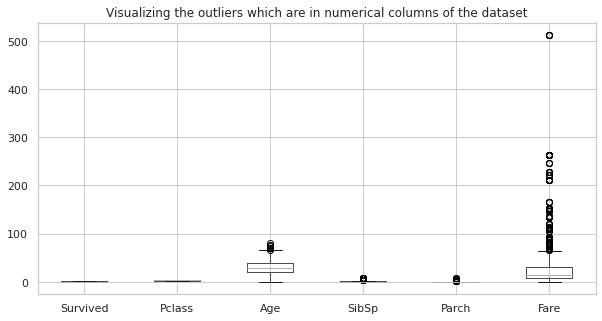

In [195]:
sel = ['Survived','Pclass','Age','SibSp','Parch','Fare']
plt.figure(figsize=(10,5))
df.boxplot(sel)
plt.title("Visualizing the outliers which are in numerical columns of the dataset")
plt.show()


## ***Completeness***

In [160]:
#checking for null values
df.isnull().sum()

Survived     418
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [161]:
#dealing with the null values
df['Survived'] = df['Survived'].fillna(df['Survived'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['Cabin'].fillna(df['Cabin'].value_counts().index[0],inplace=True)
df['Embarked'].fillna(df['Embarked'].value_counts().index[0],inplace=True)

In [162]:
#checking if i have dealt with all null values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## ***Consistency***

In [163]:
#checking for duplicates
df.duplicated().sum()

199

## ***Uniformity***

In [164]:
#removing white-spaces in columns and converting them to lowercase
df.columns =df.columns.str.strip().str.lower()

# EXPLORATORY DATA ANALYSIS

## ***Univariate analysis***

### ***Categorical Variables***

#### FREQUENCY TABLE

In [165]:
#frequency table
print("The frequency table for Sex is:")
print(df.sex.value_counts())
print("\n")
print('The frequency table for Embarked is')
df.embarked.value_counts()

The frequency table for Sex is:
male      843
female    466
Name: sex, dtype: int64


The frequency table for Embarked is


S    916
C    270
Q    123
Name: embarked, dtype: int64

#### PIE CHARTS

##### *** pie chart for distribution of sex(male,female)***

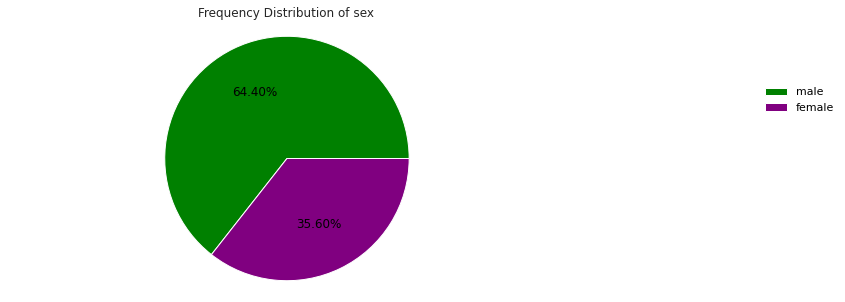

<Figure size 1440x360 with 0 Axes>

In [166]:
grouped = df.sex.value_counts().reset_index(name= "counts")

fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

color_palette_list = ['green','purple']
plt.figure(figsize=(20,5))
ax.pie(grouped['counts'],  
       colors=color_palette_list[0:2], autopct='%1.2f%%', 
       shadow=False, startangle=0)
ax.axis('equal')
ax.set_title("Frequency Distribution of sex")
ax.legend(labels=grouped['index'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

##### *** pie chart for distribution of embarked(C,Q,S)***





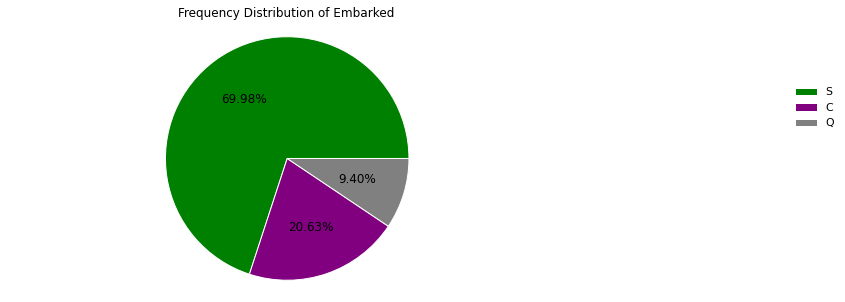

<Figure size 1440x360 with 0 Axes>

In [167]:
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

group = df.embarked.value_counts().reset_index(name= "counts")
color_palette_list = ['green','purple','grey']
plt.figure(figsize=(20,5))
ax.pie(group['counts'],  
       colors=color_palette_list[0:3], autopct='%1.2f%%', 
       shadow=False, startangle=0)
ax.axis('equal')
ax.set_title("Frequency Distribution of Embarked")
ax.legend(labels=group['index'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

### ***Numerical Variables***

#### COUNTPLOT

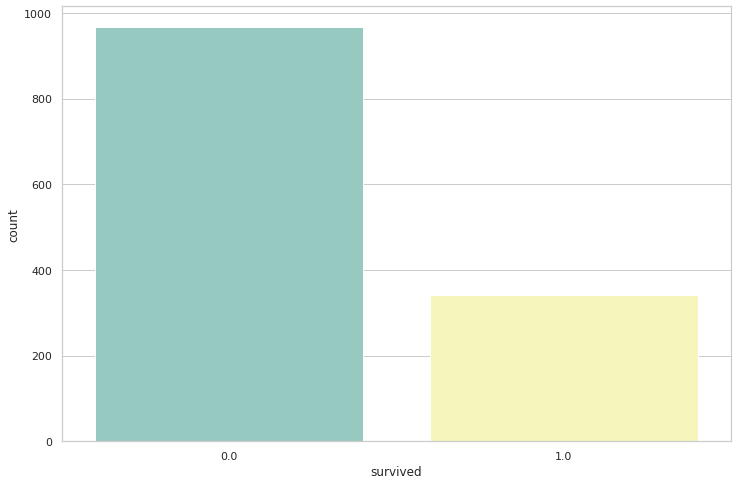

In [168]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.countplot(x=df.survived, palette='Set3')

## ***Bivariate Analysis***

### ***Categorical to Numerical***

#### COUNTPLOT

##### ***Count of those survived to sex***

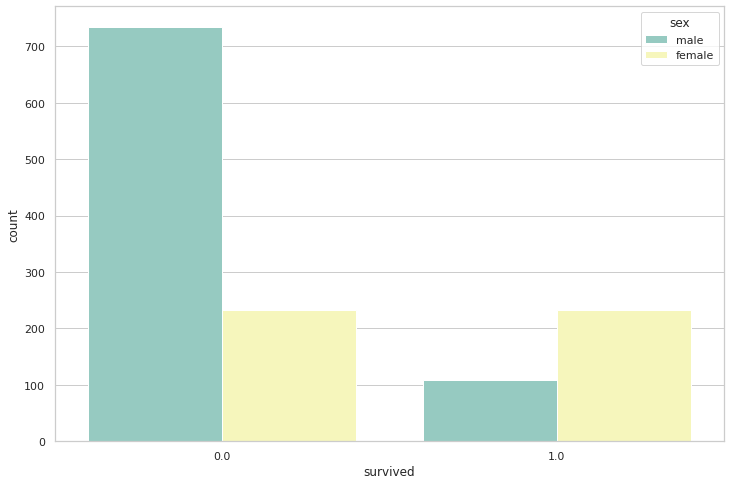

In [169]:
#survived per genger
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.countplot(x=df.survived, hue=df.sex, palette='Set3')

### ***Numerical to numerical***

#### BOXPLOT

Text(0, 0.5, 'age')

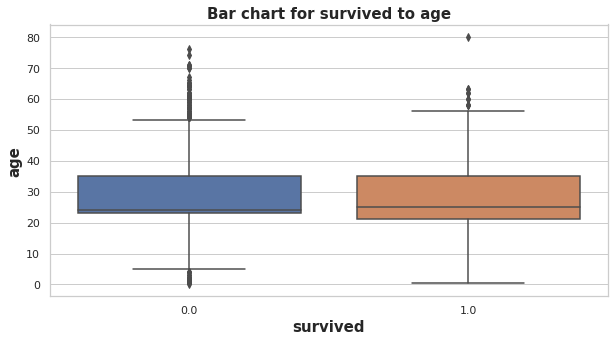

In [171]:
#Bar plot of survived to age
plt.figure(figsize=(10,5))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Bar chart for survived to age', fontweight='bold',fontsize=15)
plt.xlabel('survived',fontweight='bold',fontsize=15)
plt.ylabel('age',fontweight='bold',fontsize=15)

### ***Categorical to Categorical***

#### STACKED COLUMN CHART

##### ***Stacked chart of sex to embarked***

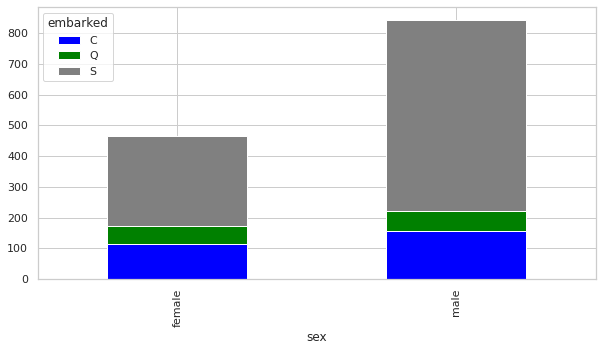

In [94]:
#Stacked bar chart of weekday with day type
pd.crosstab(df['sex'],df['embarked']).plot(kind="bar",stacked=True,figsize=(10,5) , color=['blue','green','grey'])

#### HEAT MAP

In [95]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in columns
df['sex']= label_encoder.fit_transform(df['sex'])

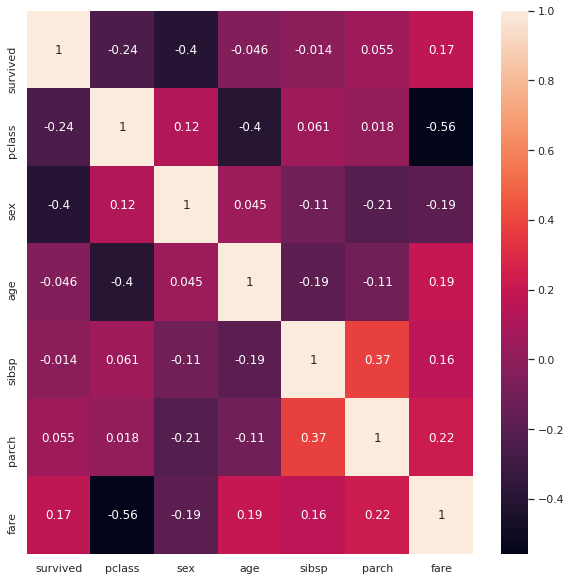

In [96]:
# plotting the correlation using a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### PAIRPLOT

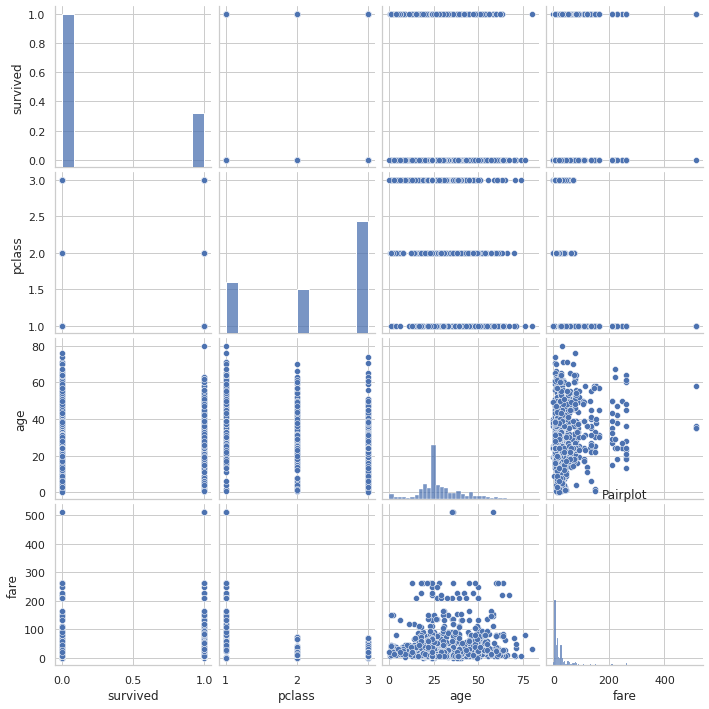

In [114]:
#select columns
col = df[['survived','pclass','sex','age','fare']]
#create pairplot
sns.pairplot(col)
plt.title("Pairplot")
plt.show()

# IMPLEMENTING THE SOLUTION

## BUILDING THE MODEL USING KNN

###1) ***Splitting into 80-20***

#### ***Label encoding***

In [34]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in columns
df['cabin']= label_encoder.fit_transform(df['cabin'])
df['embarked']= label_encoder.fit_transform(df['embarked'])

#### ***Importing required libraries***

In [35]:
#import libraries reqiured to build the model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#### ***Data Preparation***

In [36]:
#Data preparation
X = df.drop('survived',axis = 1)
y=df['survived']

##### ***Splitting our data***

In [37]:
#splitting our data in 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### ***Feature Scaling***

In [38]:
# Feature Scaling
# it is good practice to scale the features 
# so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### ***Training our data***

In [39]:
# Training our data

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

##### ***Making predictions***

In [40]:
#make predictions on our test data

y_pred = clf.predict(X_test)

##### ***Evaluating the model***

In [41]:
# Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[179  22]
 [ 29  32]]
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       201
         1.0       0.59      0.52      0.56        61

    accuracy                           0.81       262
   macro avg       0.73      0.71      0.72       262
weighted avg       0.80      0.81      0.80       262




The confusion matrix is used to measure the performance of an machine learning algorithm, usually a supervised learning one.

Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.

that is evident with the matrix shown above

         Confusion Matrix
    True Positives(TP) = 179
    True Negatives(TN) = 32
    False Positives(FP) = 22
    False Negatives(FN) = 29

The confusion matrix shows 179 + 32= 211 correct predictions and 22 + 29 = 51 incorrect predictions.

##### ***Making prediction***

In [42]:
# Making our prediction
 
mean1 = mean_squared_error(y_test, y_pred)
print(mean1)

0.1946564885496183


##### ***Getting the model accuracy***

In [43]:
print('Accuracy of KNN classifier:{}'.format(clf.score(X_test, y_test)))

Accuracy of KNN classifier:0.8053435114503816


In [44]:
"Accuracy:{}%".format(round(int(clf.score(X_test, y_test)*100)))

'Accuracy:80%'

In [45]:
print('The accuracy of 80-20 split is:')
a= "Accuracy:{}%".format(round(int(clf.score(X_test, y_test)*100)))
print(a)

The accuracy of 80-20 split is:
Accuracy:80%


###2) ***Splitting 70-30***

#### ***Splitting our data***

In [46]:
#splitting our data in 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#### ***Feature Scaling***

In [47]:
# Feature Scaling
# it is good practice to scale the features 
# so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### ***Training our data***

In [48]:
# Training our data

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### ***Making predictions(y_pred)***

In [49]:
#make predictions on our test data

y_pred = clf.predict(X_test)

#### ***Evaluating the model***

In [50]:
# Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[247  33]
 [ 72  41]]
              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       280
         1.0       0.55      0.36      0.44       113

    accuracy                           0.73       393
   macro avg       0.66      0.62      0.63       393
weighted avg       0.71      0.73      0.71       393



The confusion matrix is used to measure the performance of an machine learning algorithm, usually a supervised learning one.

Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.

that is evident with the matrix shown above
           
           Confusion Matrix
    True Positives(TP) = 247
    True Negatives(TN) = 41
    False Positives(FP) = 33
    False Negatives(FN) = 72

The confusion matrix shows 247 + 41= 288 correct predictions and 33 + 72 = 105 incorrect predictions.

####***Making prediction(mean_squared_error)***

In [51]:
# Making our prediction
 
#y_pred = clf.predict(X_test)
mean2 = mean_squared_error(y_test, y_pred)
print(mean2)

0.26717557251908397


#### ***Getting the model accuracy***

In [52]:
print('Accuracy of KNN classifier:{}'.format(clf.score(X_test, y_test)))

Accuracy of KNN classifier:0.732824427480916


In [53]:
print('The accuracy of 70-30 split is:')
b= "Accuracy:{}%".format(round(int(clf.score(X_test, y_test)*100)))
print(b)

The accuracy of 70-30 split is:
Accuracy:73%


###3) Splitting 60-40

In [54]:
#splitting our data in 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

#### ***Feature Scaling***

In [55]:
# Feature Scaling
# it is good practice to scale the features 
# so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### ***Training our data***

In [56]:
# Training our data

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### ***Making predictions(y_pred)***

In [57]:
#make predictions on our test data

y_pred = clf.predict(X_test)

#### ***Evaluating the model***

In [58]:
# Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[334  55]
 [ 70  65]]
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       389
         1.0       0.54      0.48      0.51       135

    accuracy                           0.76       524
   macro avg       0.68      0.67      0.68       524
weighted avg       0.75      0.76      0.76       524



The confusion matrix is used to measure the performance of an machine learning algorithm, usually a supervised learning one.

Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.

that is evident with the matrix shown above
           
           Confusion Matrix
    True Positives(TP) = 334
    True Negatives(TN) = 65
    False Positives(FP) = 55
    False Negatives(FN) = 70

The confusion matrix shows 334 + 65= 399 correct predictions and 55 + 70 = 125 incorrect predictions.

#### ***Making prediction(mean_squared_error)***

In [59]:
# Making our prediction
 
#y_pred = clf.predict(X_test)
mean3 = mean_squared_error(y_test, y_pred)
print(mean3)

0.2385496183206107


#### ***Getting the model accuracy***

In [60]:
print('Accuracy of KNN classifier:{}'.format(clf.score(X_test, y_test)))

Accuracy of KNN classifier:0.7614503816793893


In [61]:
"Accuracy:{}%".format(round(int(clf.score(X_test, y_test)*100)))

'Accuracy:76%'

In [62]:
print('The accuracy of 60-40 split is:')
c= "Accuracy:{}%".format(round(int(clf.score(X_test, y_test)*100)))
print(c)

The accuracy of 60-40 split is:
Accuracy:76%


# REVIEWING THE ACCURACY OF THE DIFFERENT SPLITS OF OF KNN MODEL

In [64]:
# Reviewing the Solution 
# Models vs accuracy.
splits = ['80-20', '70-30', '60-40']
mean_squared_error = ['mean_squared_error(80-20)','mean_squared_error(70-30)','mean_squared_error(60-40)']
mean_squared_erorr_each_split=[mean1,mean2,mean3]
accuracy_of_model_each_split = [a,b,c]
summary = pd.DataFrame({'Splits': splits, "Mean_squared_error_each_split":mean_squared_erorr_each_split,'Accuracy of Model in each split': accuracy_of_model_each_split})
print(summary)

  Splits  Mean_squared_error_each_split Accuracy of Model in each split
0  80-20                       0.194656                    Accuracy:80%
1  70-30                       0.267176                    Accuracy:73%
2  60-40                       0.238550                    Accuracy:76%


# RESULTS AND CONCLUSIONS

Results and Conclusion

           Splits
    80:20 - Model accuracy score: 80%

    70:30 - Model accuracy score: 73%

    60:40 - Model accuracy score: 76%

From the three splits, the model that was more accurate was the one that was split  into 80:20 . This particular model had an accuracy score of 80%

The parameters that gave the best results :

{'n_neighbors': 10}

# FOLLOW UP QUESTIONS

## Did we have the right data?

> No data had a class imbalance that affects model performance

## Do we need other data to answer our question?

> YES

## Did we have the right question?

> YES